In [1]:
from read_data import get_all_data, split_and_stratify_data, get_balanced_df
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, log_loss, matthews_corrcoef
import scikitplot as skplt
from save_load_models import *
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore') 

## Read Data

In [2]:
full_dataset = get_all_data(number_of_pca_features = 100)
full_dataset.head()

# split into train test and validation datasets
train, test, validate = split_and_stratify_data(full_dataset, random = 1)

# create X and y train, test and validate sets
X_train = train.iloc[:,2:-1]
X_test = test.iloc[:,2:-1]
X_validate = validate.iloc[:,2:-1]

y_train = train.iloc[:,1]
y_test = test.iloc[:,1]
y_validate = validate.iloc[:,1]

sm = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

GroundTruth.csv read. Processing/searching for image data. May take a few minutes if process_images_again == True.

Existing image data read..
Here is the cumulative variance explained by the top n principal components..
[0.31257716 0.54008686 0.66481299 0.7057795  0.74346465 0.77956174
 0.80114615 0.81924822 0.83539777 0.8507423  0.86424108 0.8750329
 0.88251965 0.88884104 0.89510091 0.90050337 0.90577069 0.91083161
 0.91540637 0.91968503 0.92259132 0.92535737 0.92803304 0.93063927
 0.93311294 0.93549835 0.93778653 0.93980628 0.94179666 0.94344428
 0.94486636 0.94619368 0.94750187 0.94877141 0.95000678 0.95122232
 0.95237959 0.9534572  0.95452557 0.95557189 0.95661161 0.95758342
 0.95852778 0.95936875 0.96019455 0.96099447 0.96176479 0.96252313
 0.96324924 0.9639561  0.96464723 0.96529059 0.96592324 0.9665458
 0.96711326 0.96765529 0.96819545 0.96870674 0.96921178 0.96970669
 0.97018163 0.97064448 0.97110586 0.97154421 0.971972   0.97238688
 0.97279964 0.97319277 0.97357719 0.97395033

## Helper Function

In [3]:
def evaluate_model(model, y_test, X_test):
    y_pred = model.predict(X_test)
    y_probas = model.predict_proba(X_test)

    print(f'Model Accuracy is {round(accuracy_score(y_test, y_pred),4)*100}%')
    print(f'Log loss of the model is {round(log_loss(y_test, y_probas), 3)}')
    print(f'Matthews Correlation Coefficient is {round(matthews_corrcoef(y_test, y_pred),3)}')
    print('\nHere is the classification report. \n')
    print(classification_report(y_test, y_pred))

    print('Confusion Matrix is here:\n')
    plot_confusion_matrix(model, X_test, y_test)  
    plt.show() 

    print('Here are the ROC Curves: \n')
    skplt.metrics.plot_roc_curve(y_test, y_probas)
    plt.show()

## Import & Evaluate Saved Model

In [4]:
mlp_model = load_scikit_model(filename='models/mlp_model.sav')

Model Accuracy is 72.16%
Log loss of the model is 0.924
Matthews Correlation Coefficient is 0.438

Here is the classification report. 

              precision    recall  f1-score   support

       AKIEC       0.33      0.28      0.31        32
         BCC       0.57      0.50      0.53        52
         BKL       0.42      0.39      0.41       110
          DF       0.00      0.00      0.00        11
         MEL       0.42      0.35      0.38       112
          NV       0.83      0.90      0.86       671
        VASC       0.31      0.29      0.30        14

    accuracy                           0.72      1002
   macro avg       0.41      0.39      0.40      1002
weighted avg       0.70      0.72      0.71      1002

Confusion Matrix is here:



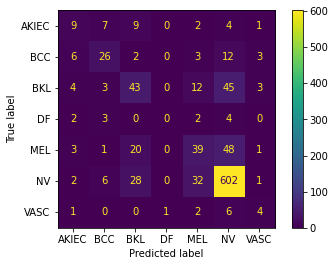

Here are the ROC Curves: 



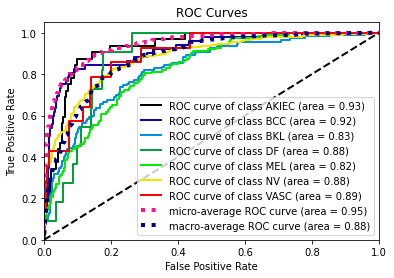

In [5]:
evaluate_model(model=mlp_model, y_test=y_validate, X_test=X_validate)